In [1]:
import os

print(os.getcwd())

/home/caiocesart/code/Projeto_Aplicado_II


In [2]:
import pandas as pd

df = pd.read_csv('data/olist_order_reviews_dataset.csv')
df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [4]:
df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [5]:
df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [6]:
(df.isnull().sum() / df.shape[0]) * 100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

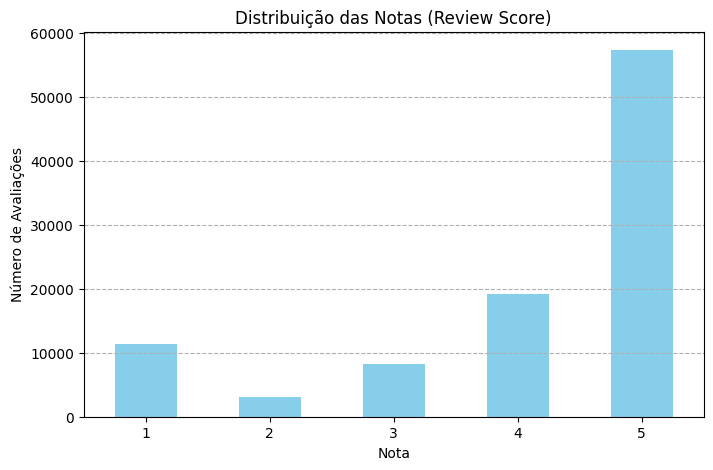

In [7]:
import matplotlib.pyplot as plt

# Calculate value counts for the review_score
score_counts = df['review_score'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(8, 5))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Notas (Review Score)')
plt.xlabel('Nota')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.grid(axis='y', linestyle='--')
plt.show()

In [8]:
# Amostra de review_comment_title não nulos
print("Amostra de Títulos de Comentários (não nulos):")
# Using .tolist() for cleaner output in the notebook
print(df['review_comment_title'].dropna().sample(10).tolist())

print('\n' + '-'*50 + '\n')

# Amostra de review_comment_message não nulos
print("Amostra de Mensagens de Comentários (não nulos):")
# Using .tolist() for cleaner output in the notebook
print(df['review_comment_message'].dropna().sample(10).tolist())

Amostra de Títulos de Comentários (não nulos):
['Empresa lixo', 'Muito bom', 'Reclamacao Falta de Entre', 'Muito satisfeita', 'Falta mais compromisso', 'Mochila ok', 'otimo resultado', 'Troca ', 'Adesivo otimo', 'Recomendo']

--------------------------------------------------

Amostra de Mensagens de Comentários (não nulos):
['otimo', 'Os correios atrasaram. ', 'FIZ UMA COMPRA DE DUAS LUMINÁRIAS , MEIA LUA , DIVULGADA NO SITE DA PROMOM.\r\n NO DIA 25/06 RECEBI APENAS UMA DELAS, \r\nESTOU NO AGUARDO DA OUTRA LUMINARIA. \r\nÉ MINHA PRIMEIRA COMPRA E ESTOU CHATEAD', '.', 'Não recebi o braço de ducha com desviador, somente a ducha 20x20 com braço de 30cm.', 'Loja mal organizada\r\n', 'Produto entregue antes do prazo', 'Gostei doproduto comprado obrigado.', 'Recomendo sempre ', 'Eu recomendo 👏🏽👏🏽👏🏽']


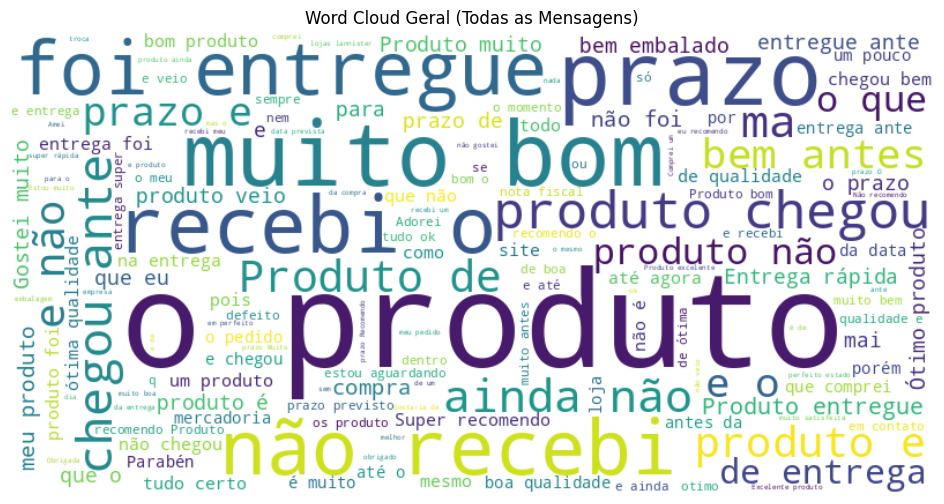

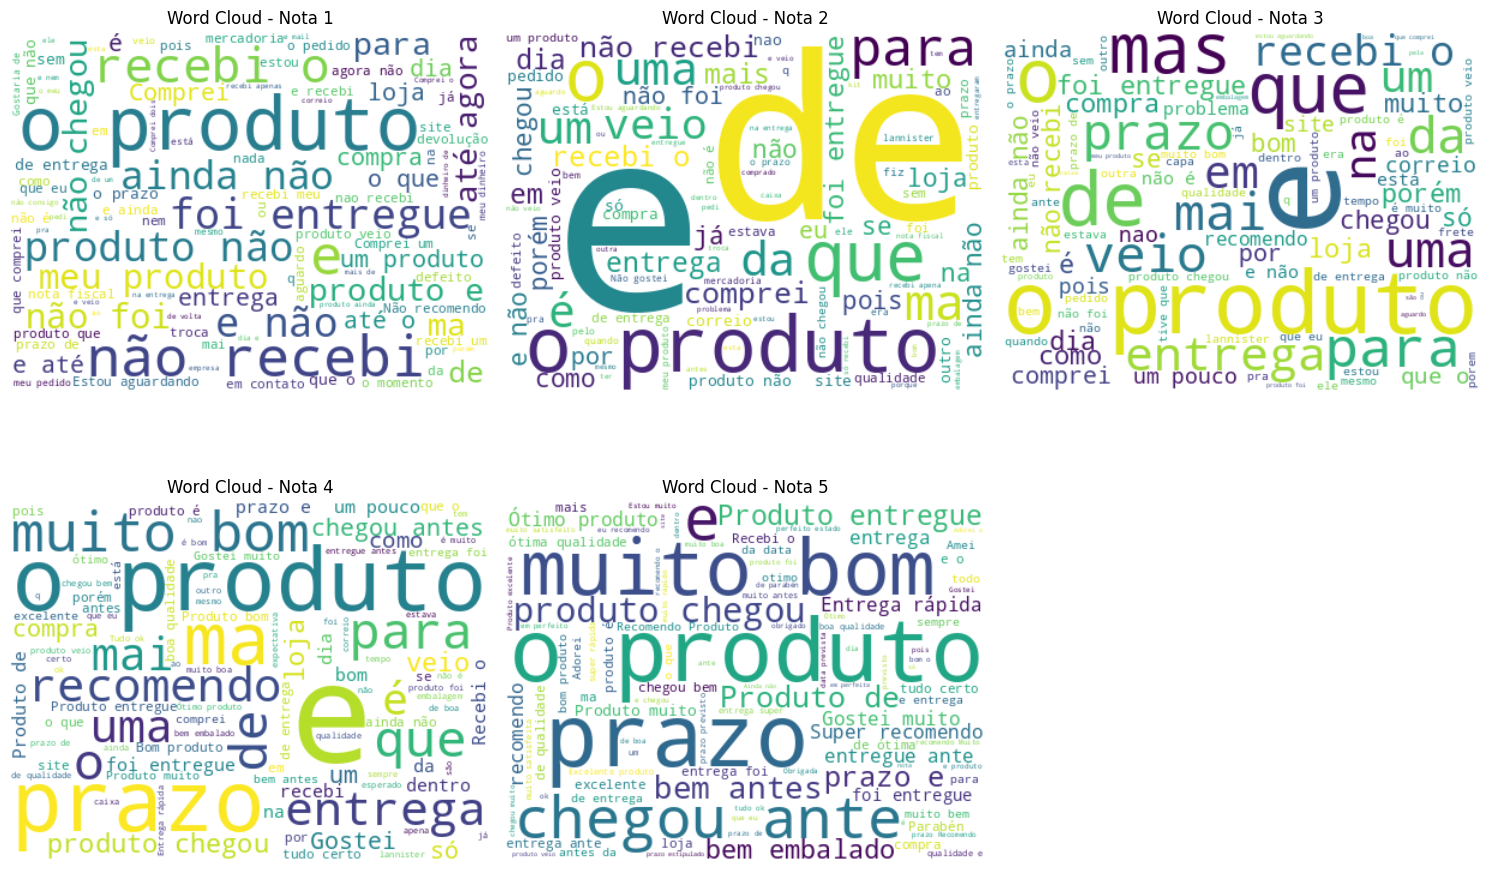

In [9]:
from wordcloud import WordCloud


text_all = ' '.join(review for review in df['review_comment_message'].dropna())


wordcloud_all = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=150,
    contour_width=1,
    contour_color='steelblue'
)


wordcloud_all.generate(text_all)


plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Geral (Todas as Mensagens)')
plt.show()



plt.figure(figsize=(15, 10))

for score in sorted(df['review_score'].unique()):
    # Filter DataFrame for the current score and non-null messages
    df_score = df[(df['review_score'] == score) & (df['review_comment_message'].notna())]

    # Concatenate messages for the current score
    text_score = ' '.join(review for review in df_score['review_comment_message'])

    # Check if there is any text for the current score
    if not text_score:
        print(f"No comments found for review score {score}.")
        continue # Skip if no text

    # Create WordCloud object for the current score
    wordcloud_score = WordCloud(
        width=400,
        height=300,
        background_color='white',
        colormap='viridis',
        max_words=100,
        contour_width=1,
        contour_color='steelblue'
    )

    # Generate the word cloud
    wordcloud_score.generate(text_score)

    # Add subplot for the current score
    # Assuming 5 scores, create a 2x3 grid (adjust if needed)
    plt.subplot(2, 3, score) # Position based on score (1 to 5)
    plt.imshow(wordcloud_score, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - Nota {score}')

plt.tight_layout()
plt.show()

In [10]:
import spacy
import re
import string
from tqdm.notebook import tqdm # Optional: for progress bar
from ipywidgets import FloatProgress

# --- 1. Handle Missing Values & Select Columns ---
df_processed = df.dropna(subset=['review_comment_message']).copy()

# Select relevant columns
df_processed = df_processed[['review_score', 'review_comment_message']].reset_index(drop=True)

print(f"Original non-null messages: {df.review_comment_message.notna().sum()}")
print(f"Shape after dropping nulls: {df_processed.shape}")


# --- 2. Load spaCy Model ---
try:
    nlp = spacy.load('pt_core_news_sm', disable=['parser', 'ner'])
    print("spaCy Portuguese model loaded successfully.")
except OSError:
    print('spaCy Portuguese model not found.')
    print('Please run: python -m spacy download pt_core_news_sm')
    # Exit or handle error appropriately
    nlp = None # Set nlp to None to prevent further errors if model isn't loaded

# Get the default stop words list from spaCy
if nlp:
    stop_words = spacy.lang.pt.stop_words.STOP_WORDS
else:
    stop_words = set() # Use an empty set if spacy failed


# --- 3. Define Preprocessing Functions ---

def clean_text(text):
    """Converts to lowercase, removes punctuation, numbers, and extra whitespace."""
    if not isinstance(text, str):
        return "" # Return empty string for non-string inputs (like NaN if not dropped)

    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def lemmatize_and_remove_stopwords(text):
    """Lemmatizes text and removes stop words using spaCy."""
    if not nlp or not isinstance(text, str) or not text:
        return "" # Return empty string if spaCy not loaded or input invalid

    doc = nlp(text)
    # Keep tokens that are not stop words and not punctuation
    # Use lemma_ for the base form
    lemmatized_tokens = [
        token.lemma_ for token in doc
        if token.text not in stop_words and not token.is_punct and not token.is_space
    ]
    return ' '.join(lemmatized_tokens)

# --- 4. Apply Preprocessing ---
if nlp:
    print("Starting text preprocessing...")

    # Apply basic cleaning first
    tqdm.pandas(desc="Cleaning Text")
    df_processed['review_comment_processed'] = df_processed['review_comment_message'].progress_apply(clean_text)

    # Apply lemmatization and stop word removal on the cleaned text
    tqdm.pandas(desc="Lemmatizing and Removing Stopwords")
    df_processed['review_comment_processed'] = df_processed['review_comment_processed'].progress_apply(lemmatize_and_remove_stopwords)

    print("Preprocessing finished.")

    # Display samples of original vs processed text
    print("\nSample Comparison (Original vs Processed):")
    sample_indices = df_processed.sample(5).index
    for index in sample_indices:
        print(f"--- Review {index} ---")
        print(f"Score: {df_processed.loc[index, 'review_score']}")
        print(f"Original:  {df_processed.loc[index, 'review_comment_message']}")
        print(f"Processed: {df_processed.loc[index, 'review_comment_processed']}")
        print("-" * 20)

    # Select final columns for this stage
    df_final = df_processed[['review_score', 'review_comment_message', 'review_comment_processed']].copy()
    print("\nFinal DataFrame shape:", df_final.shape)
    print(df_final.head())

else:
    print("Skipping preprocessing as spaCy model could not be loaded.")
    df_final = pd.DataFrame(columns=['review_score', 'review_comment_message', 'review_comment_processed'])

# df_final now contains the target variable and the processed text, ready for vectorization in the next step.

Original non-null messages: 40977
Shape after dropping nulls: (40977, 2)
spaCy Portuguese model loaded successfully.
Starting text preprocessing...


Cleaning Text:   0%|          | 0/40977 [00:00<?, ?it/s]

Lemmatizing and Removing Stopwords:   0%|          | 0/40977 [00:00<?, ?it/s]

Preprocessing finished.

Sample Comparison (Original vs Processed):
--- Review 21941 ---
Score: 4
Original:  Ótimo atendimento 
Processed: bom atendimento
--------------------
--- Review 13056 ---
Score: 5
Original:  Muito eficiente e rapidez na entrega do produto.
Processed: eficiente rapidez entrega produto
--------------------
--- Review 36632 ---
Score: 1
Original:  Só entregou metade do pedido
Processed: entregar metade pedido
--------------------
--- Review 13989 ---
Score: 3
Original:  Prazo de entrega é muito demorado.
Processed: prazo entrega demorado
--------------------
--- Review 34046 ---
Score: 5
Original:  Produto incrível, veio bem lacrado, meu filho amou. Chegou bem antes do prazo. Muito satisfeita com as Lojas lannister e a Loja parceira targaryen, estão de parabéns!
Processed: produto incrível vir lacrar filho amar chegar prazo satisfeito loja lannister loja parceiro targaryen parabéns
--------------------

Final DataFrame shape: (40977, 3)
   review_score           

In [17]:
df_final.head()

,review_score,review_comment_message,review_comment_processed
0,5,Recebi bem antes do prazo estipulado.,recebi prazo estipular
1,5,Parabéns lojas lannister adorei comprar pela I...,parabéns loja lannister adorar comprar Interne...
2,4,aparelho eficiente. no site a marca do aparelh...,aparelho eficiente site marca aparelho impress...
3,4,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",travandopelo ta
4,5,"Vendedor confiável, produto ok e entrega antes...",vendedor confiável produto ok entregar prazo


In [14]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /home/caiocesart/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/caiocesart/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [15]:
from nltk import bigrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import collections # Para o defaultdict

# --- Baixar recursos do NLTK (se necessário) ---
try:
    nltk.data.find('tokenizers/punkt')
except nltk.downloader.DownloadError:
    print("Baixando o recurso 'punkt' do NLTK...")
    nltk.download('punkt', quiet=True) # quiet=True para menos output
except LookupError: # Se já foi baixado mas não encontrado no path padrão
    print("Recurso 'punkt' do NLTK não encontrado no path padrão. Tentando baixar...")
    nltk.download('punkt', quiet=True)


# Supondo que 'df_final' é o DataFrame resultante da etapa anterior
# df_final = ... (resultado do código anterior)

print("Calculando Bigramas Mais Comuns por Score...\n")

# Dicionário para armazenar os resultados
top_bigrams_per_score = collections.defaultdict(list)

# Iterar por cada score único no DataFrame
for score in sorted(df_final['review_score'].unique()):
    print(f"--- Score {score} ---")

    # Filtrar o DataFrame para o score atual e pegar os comentários processados
    # Garantir que estamos trabalhando com strings e não nulos/floats
    comments_for_score = df_final[df_final['review_score'] == score]['review_comment_processed'].astype(str).dropna()

    # Concatenar todos os comentários para o score atual em um único texto
    full_text_for_score = ' '.join(comments_for_score)

    # Tokenizar o texto completo em palavras
    if full_text_for_score: # Verificar se há texto para processar
        tokens = word_tokenize(full_text_for_score, language='portuguese')

        # Gerar bigramas a partir dos tokens
        score_bigrams = list(bigrams(tokens))

        # Calcular a frequência de cada bigrama
        freq_dist = FreqDist(score_bigrams)

        # Obter os 3 bigramas mais comuns
        most_common_bigrams = freq_dist.most_common(3)

        # Armazenar e imprimir os resultados
        top_bigrams_per_score[score] = most_common_bigrams
        if most_common_bigrams:
            for bigram, count in most_common_bigrams:
                print(f"  Bigrama: {bigram}, Contagem: {count}")
        else:
            print("  Nenhum bigrama encontrado para este score (texto insuficiente ou muito curto).")

    else:
        print("  Nenhum comentário processado encontrado para este score.")

    print("-" * 20)

# O dicionário top_bigrams_per_score contém os resultados caso precise usá-los programaticamente depois.

Calculando Bigramas Mais Comuns por Score...

--- Score 1 ---
  Bigrama: ('recebi', 'produto'), Contagem: 1095
  Bigrama: ('produto', 'entregar'), Contagem: 504
  Bigrama: ('produto', 'chegar'), Contagem: 370
--------------------
--- Score 2 ---
  Bigrama: ('recebi', 'produto'), Contagem: 152
  Bigrama: ('produto', 'vir'), Contagem: 101
  Bigrama: ('produto', 'entregar'), Contagem: 82
--------------------
--- Score 3 ---
  Bigrama: ('recebi', 'produto'), Contagem: 161
  Bigrama: ('produto', 'chegar'), Contagem: 138
  Bigrama: ('produto', 'entregar'), Contagem: 135
--------------------
--- Score 4 ---
  Bigrama: ('entregar', 'prazo'), Contagem: 430
  Bigrama: ('chegar', 'prazo'), Contagem: 359
  Bigrama: ('produto', 'entregar'), Contagem: 302
--------------------
--- Score 5 ---
  Bigrama: ('entregar', 'prazo'), Contagem: 1840
  Bigrama: ('chegar', 'prazo'), Contagem: 1551
  Bigrama: ('produto', 'chegar'), Contagem: 1174
--------------------


In [16]:
from nltk import trigrams # Import trigrams
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

# --- Baixar recursos do NLTK (se necessário - já deve estar OK do passo anterior) ---
try:
    nltk.data.find('tokenizers/punkt')
except (nltk.downloader.DownloadError, LookupError):
    print("Baixando o recurso 'punkt' do NLTK...")
    nltk.download('punkt', quiet=True)

# Supondo que 'df_final' é o DataFrame resultante da etapa anterior
# df_final = ...

print("Calculando Trigramas Mais Comuns por Score...\n")

# Dicionário para armazenar os resultados
top_trigrams_per_score = collections.defaultdict(list)

# Iterar por cada score único no DataFrame
for score in sorted(df_final['review_score'].unique()):
    print(f"--- Score {score} ---")

    # Filtrar o DataFrame para o score atual e pegar os comentários processados
    comments_for_score = df_final[df_final['review_score'] == score]['review_comment_processed'].astype(str).dropna()

    # Concatenar todos os comentários para o score atual em um único texto
    full_text_for_score = ' '.join(comments_for_score)

    # Tokenizar o texto completo em palavras
    if full_text_for_score:
        tokens = word_tokenize(full_text_for_score, language='portuguese')

        # Gerar trigramas a partir dos tokens
        score_trigrams = list(trigrams(tokens)) # Usar trigrams() aqui

        # Calcular a frequência de cada trigrama
        freq_dist = FreqDist(score_trigrams)

        # Obter os 3 trigramas mais comuns
        most_common_trigrams = freq_dist.most_common(3) # Obter os 3 mais comuns

        # Armazenar e imprimir os resultados
        top_trigrams_per_score[score] = most_common_trigrams
        if most_common_trigrams:
            for trigram, count in most_common_trigrams:
                print(f"  Trigrama: {trigram}, Contagem: {count}")
        else:
            print("  Nenhum trigrama encontrado para este score (texto insuficiente ou muito curto).")

    else:
        print("  Nenhum comentário processado encontrado para este score.")

    print("-" * 20)

# O dicionário top_trigrams_per_score contém os resultados.

Calculando Trigramas Mais Comuns por Score...

--- Score 1 ---
  Trigrama: ('nao', 'recebi', 'produto'), Contagem: 126
  Trigrama: ('produto', 'recebi', 'produto'), Contagem: 66
  Trigrama: ('recebi', 'produto', 'comprei'), Contagem: 64
--------------------
--- Score 2 ---
  Trigrama: ('produto', 'chegar', 'prazo'), Contagem: 17
  Trigrama: ('produto', 'vir', 'defeito'), Contagem: 16
  Trigrama: ('comprei', 'produto', 'recebi'), Contagem: 11
--------------------
--- Score 3 ---
  Trigrama: ('produto', 'entregar', 'prazo'), Contagem: 46
  Trigrama: ('produto', 'chegar', 'prazo'), Contagem: 41
  Trigrama: ('entregar', 'prazo', 'produto'), Contagem: 17
--------------------
--- Score 4 ---
  Trigrama: ('produto', 'entregar', 'prazo'), Contagem: 159
  Trigrama: ('produto', 'chegar', 'prazo'), Contagem: 134
  Trigrama: ('entregar', 'prazo', 'produto'), Contagem: 69
--------------------
--- Score 5 ---
  Trigrama: ('produto', 'entregar', 'prazo'), Contagem: 617
  Trigrama: ('produto', 'chegar

Formato do DataFrame para vetorização: (40977, 3)
Contagem de nulos em 'review_comment_processed': 0

Iniciando Vetorização TF-IDF...
Formato da Matriz TF-IDF (features): (40977, 5000)
Formato da Variável Alvo (scores): (40977,)

Dividindo dados em treino e teste...
Tamanho do conjunto de Treino: Features=(32781, 5000), Target=(32781,)
Tamanho do conjunto de Teste: Features=(8196, 5000), Target=(8196,)

Treinando Modelo Baseline (Regressão Logística)...
Treinamento concluído.

Avaliando Modelo Baseline no conjunto de teste...

Acurácia do Modelo Baseline: 0.6744

Relatório de Classificação:
              precision    recall  f1-score   support

     Score 1       0.64      0.84      0.73      1749
     Score 2       0.22      0.01      0.03       429
     Score 3       0.34      0.13      0.19       712
     Score 4       0.32      0.09      0.14      1195
     Score 5       0.73      0.94      0.82      4111

    accuracy                           0.67      8196
   macro avg       0.4

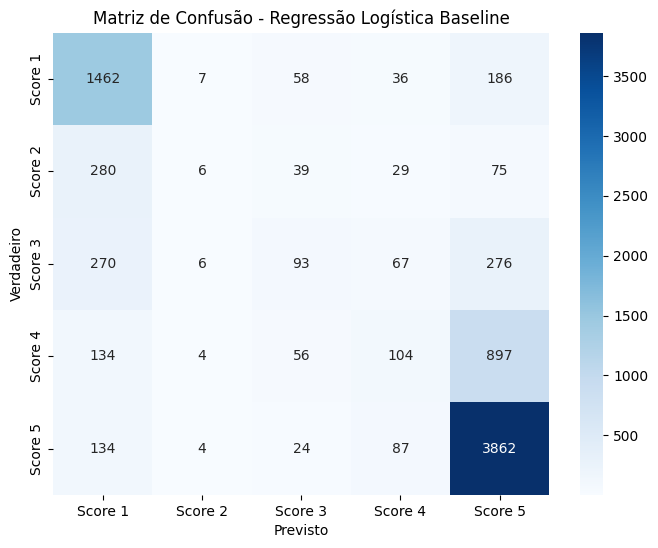

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar se há dados suficientes para prosseguir
if df_final.empty or df_final['review_comment_processed'].isnull().all():
    print("DataFrame está vazio ou não contém comentários processados válidos. Saindo.")
else:
    print(f"Formato do DataFrame para vetorização: {df_final.shape}")
    print(f"Contagem de nulos em 'review_comment_processed': {df_final['review_comment_processed'].isnull().sum()}")

    # --- 1. Vetorização com TF-IDF ---
    print("\nIniciando Vetorização TF-IDF...")

    # Preencher quaisquer NaNs restantes na coluna processada (embora não devessem existir)
    df_final['review_comment_processed'] = df_final['review_comment_processed'].fillna('')

    # Instanciar o vetorizador TF-IDF
    # max_features limita o vocabulário às N palavras mais frequentes (útil para memória/performance)
    tfidf_vectorizer = TfidfVectorizer(
        max_features=5000,  # Ajuste conforme necessário
        ngram_range=(1, 3) # Começar com unigramas, (1, 2) incluiria bigramas
    )

    # Aplicar TF-IDF aos comentários processados
    X_tfidf = tfidf_vectorizer.fit_transform(df_final['review_comment_processed'])

    # Variável alvo
    y = df_final['review_score']

    print(f"Formato da Matriz TF-IDF (features): {X_tfidf.shape}")
    print(f"Formato da Variável Alvo (scores): {y.shape}")


    # --- 2. Divisão Treino/Teste ---
    print("\nDividindo dados em treino e teste...")

    # Dividir os dados (80% treino, 20% teste)
    # Usar stratify=y para manter a proporção das classes nos conjuntos
    X_train, X_test, y_train, y_test = train_test_split(
        X_tfidf,
        y,
        test_size=0.2,  # 20% para teste
        random_state=42, # Para reprodutibilidade
        stratify=y       # Essencial para classes desbalanceadas
    )

    print(f"Tamanho do conjunto de Treino: Features={X_train.shape}, Target={y_train.shape}")
    print(f"Tamanho do conjunto de Teste: Features={X_test.shape}, Target={y_test.shape}")


    # --- 3. Treinamento do Modelo Baseline (Regressão Logística) ---
    print("\nTreinando Modelo Baseline (Regressão Logística)...")

    # Instanciar o modelo
    # 'multi_class='ovr'' (One-vs-Rest) é uma estratégia comum para multiclasse
    # 'solver='lbfgs'' é um bom solver padrão para isso. Aumentar max_iter se não convergir.
    log_reg_baseline = LogisticRegression(
        solver='lbfgs',
        max_iter=1000, # Aumentado para garantir convergência com muitas features
        random_state=42,
        C=1.0 # Parâmetro de regularização (padrão é 1.0)
    )

    # Treinar o modelo
    log_reg_baseline.fit(X_train, y_train)
    print("Treinamento concluído.")


    # --- 4. Avaliação do Modelo Baseline ---
    print("\nAvaliando Modelo Baseline no conjunto de teste...")

    # Fazer previsões no conjunto de teste
    y_pred_baseline = log_reg_baseline.predict(X_test)

    # Calcular Acurácia
    accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
    print(f"\nAcurácia do Modelo Baseline: {accuracy_baseline:.4f}")

    # Exibir Relatório de Classificação Detalhado
    print("\nRelatório de Classificação:")
    # target_names pode ser usado para nomes mais descritivos se desejar
    print(classification_report(y_test, y_pred_baseline, target_names=[f'Score {i}' for i in sorted(y.unique())]))

    # Exibir Matriz de Confusão
    print("\nMatriz de Confusão:")
    cm = confusion_matrix(y_test, y_pred_baseline)
    print(cm)

    # Visualizar Matriz de Confusão
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f'Score {i}' for i in sorted(y.unique())],
                yticklabels=[f'Score {i}' for i in sorted(y.unique())])
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Regressão Logística Baseline')
    plt.show()

Iniciando reclassificação e novo modelo baseline (3 classes)...

Distribuição das novas categorias:
score_category
Bom       0.647436
Ruim      0.265759
Neutro    0.086805
Name: proportion, dtype: float64

Usando a matriz TF-IDF existente com formato: (40977, 5000)
Formato da nova Variável Alvo (categorias): (40977,)

Dividindo dados em treino e teste para 3 classes...
Tamanho do conjunto de Treino: Features=(32781, 5000), Target=(32781,)
Tamanho do conjunto de Teste: Features=(8196, 5000), Target=(8196,)

Treinando Modelo Baseline (Regressão Logística - 3 Classes)...
Treinamento concluído.

Avaliando Modelo Baseline (3 Classes) no conjunto de teste...

Acurácia do Modelo Baseline (3 Classes): 0.8254

Relatório de Classificação (3 Classes):
              precision    recall  f1-score   support

        Ruim       0.75      0.81      0.78      2178
      Neutro       0.27      0.04      0.07       712
         Bom       0.87      0.94      0.90      5306

    accuracy                   

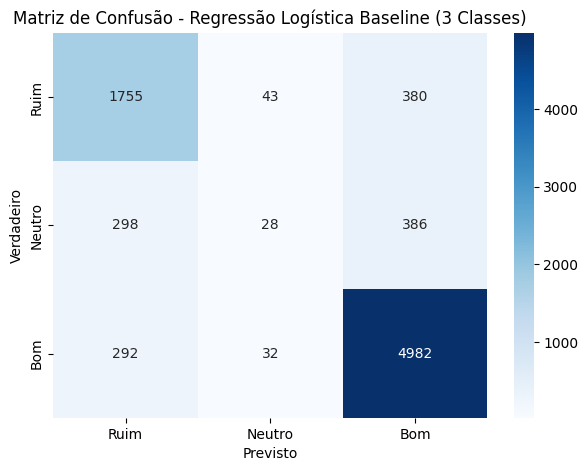

In [22]:
# Verificar se os dados de entrada existem
if 'df_final' not in globals() or 'X_tfidf' not in globals():
    print("Erro: DataFrame 'df_final' ou matriz 'X_tfidf' não encontrados.")
    print("Por favor, execute as etapas anteriores de pré-processamento e vetorização primeiro.")
elif df_final.empty:
    print("DataFrame 'df_final' está vazio. Saindo.")
else:
    print("Iniciando reclassificação e novo modelo baseline (3 classes)...")

    # --- 1. Reclassificação dos Scores ---
    def map_score_to_category(score):
        if score in [1, 2]:
            return 'Ruim'
        elif score == 3:
            return 'Neutro'
        elif score in [4, 5]:
            return 'Bom'
        else:
            return np.nan # Caso exista algum score inesperado

    df_final['score_category'] = df_final['review_score'].apply(map_score_to_category)

    # Verificar a distribuição das novas categorias
    print("\nDistribuição das novas categorias:")
    print(df_final['score_category'].value_counts(normalize=True)) # normalize=True mostra percentuais

    # Nova variável alvo
    y_cat = df_final['score_category']

    # --- 2. Manter Vetorização ---
    # Usaremos o X_tfidf calculado anteriormente. Nenhuma ação necessária aqui.
    print(f"\nUsando a matriz TF-IDF existente com formato: {X_tfidf.shape}")
    print(f"Formato da nova Variável Alvo (categorias): {y_cat.shape}")

    # --- 3. Nova Divisão Treino/Teste (3 Classes) ---
    print("\nDividindo dados em treino e teste para 3 classes...")

    X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(
        X_tfidf,
        y_cat,
        test_size=0.2,
        random_state=42,
        stratify=y_cat # Estratificar pela NOVA variável alvo categórica
    )

    print(f"Tamanho do conjunto de Treino: Features={X_train_cat.shape}, Target={y_train_cat.shape}")
    print(f"Tamanho do conjunto de Teste: Features={X_test_cat.shape}, Target={y_test_cat.shape}")


    # --- 4. Treinamento do Modelo Baseline (Regressão Logística - 3 Classes) ---
    print("\nTreinando Modelo Baseline (Regressão Logística - 3 Classes)...")

    log_reg_baseline_cat = LogisticRegression(
        solver='lbfgs',
        max_iter=1000,
        random_state=42,
        C=1.0
    )

    log_reg_baseline_cat.fit(X_train_cat, y_train_cat)
    print("Treinamento concluído.")


    # --- 5. Avaliação do Modelo Baseline (3 Classes) ---
    print("\nAvaliando Modelo Baseline (3 Classes) no conjunto de teste...")

    y_pred_baseline_cat = log_reg_baseline_cat.predict(X_test_cat)

    accuracy_baseline_cat = accuracy_score(y_test_cat, y_pred_baseline_cat)
    print(f"\nAcurácia do Modelo Baseline (3 Classes): {accuracy_baseline_cat:.4f}")

    print("\nRelatório de Classificação (3 Classes):")
    # Definir a ordem das labels para o relatório e matriz
    category_labels = ['Ruim', 'Neutro', 'Bom']
    print(classification_report(y_test_cat, y_pred_baseline_cat, labels=category_labels))

    print("\nMatriz de Confusão (3 Classes):")
    cm_cat = confusion_matrix(y_test_cat, y_pred_baseline_cat, labels=category_labels)
    print(cm_cat)

    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_cat, annot=True, fmt='d', cmap='Blues',
                xticklabels=category_labels,
                yticklabels=category_labels)
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - Regressão Logística Baseline (3 Classes)')
    plt.show()


Iniciando treinamento e otimização do modelo XGBoost (3 classes)...

Codificando labels categóricas ('Ruim', 'Neutro', 'Bom') para numéricas...
Mapeamento das Classes: {0: 'Bom', 1: 'Neutro', 2: 'Ruim'}

Treinando XGBoost com parâmetros padrão (para comparação)...


/home/caiocesart/code/Projeto_Aplicado_II/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:33:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia XGBoost (Padrão): 0.8130

Definindo espaço de busca para otimização...

Iniciando RandomizedSearchCV para XGBoost...
Fitting 3 folds for each of 50 candidates, totalling 150 fits


/home/caiocesart/code/Projeto_Aplicado_II/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/caiocesart/code/Projeto_Aplicado_II/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/caiocesart/code/Projeto_Aplicado_II/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/caiocesart/code/Projeto_Aplicado_II/.venv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [18:34:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not use


Melhores Hiperparâmetros encontrados: {'colsample_bytree': np.float64(0.8788062963981071), 'gamma': np.float64(0.35124204199355463), 'learning_rate': np.float64(0.11784734536592655), 'max_depth': 7, 'n_estimators': 781, 'reg_alpha': np.float64(0.8093611554785136), 'reg_lambda': np.float64(0.8101133946791808), 'subsample': np.float64(0.9468289274320415)}
Melhor Score (Accuracy) na Validação Cruzada: 0.8186

Avaliando Modelo XGBoost Otimizado no conjunto de teste...

Acurácia XGBoost Otimizado: 0.8231

Relatório de Classificação (XGBoost Otimizado):
              precision    recall  f1-score   support

         Bom       0.87      0.94      0.90      5306
      Neutro       0.36      0.09      0.15       712
        Ruim       0.75      0.79      0.77      2178

    accuracy                           0.82      8196
   macro avg       0.66      0.60      0.60      8196
weighted avg       0.79      0.82      0.80      8196


Matriz de Confusão (XGBoost Otimizado):
        Ruim  Neutro   

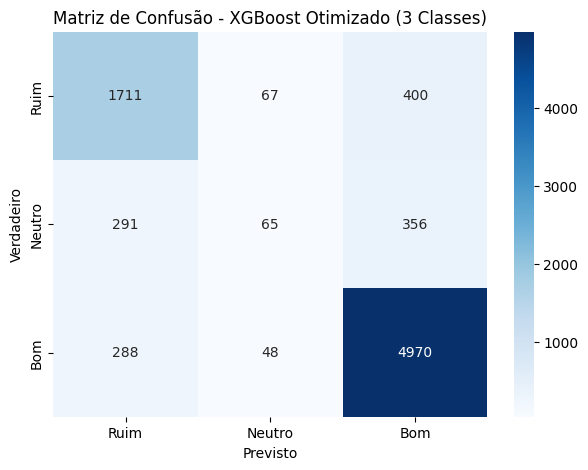

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import uniform, randint

# Verificar se os dados de entrada existem
required_vars = ['X_tfidf', 'y_cat', 'X_train_cat', 'X_test_cat', 'y_train_cat', 'y_test_cat']
if not all(var in globals() for var in required_vars):
    print("Erro: Variáveis necessárias das etapas anteriores não encontradas.")
    print("Por favor, execute as etapas anteriores de pré-processamento, vetorização, reclassificação e divisão treino/teste primeiro.")
else:
    print("Iniciando treinamento e otimização do modelo XGBoost (3 classes)...")

    # --- 2. Codificação Numérica do Target ---
    print("\nCodificando labels categóricas ('Ruim', 'Neutro', 'Bom') para numéricas...")
    label_encoder = LabelEncoder()

    # Ajustar o encoder APENAS nos dados de treino
    y_train_encoded = label_encoder.fit_transform(y_train_cat)
    # Transformar os dados de teste usando o encoder AJUSTADO
    y_test_encoded = label_encoder.transform(y_test_cat)

    # Guardar as classes mapeadas para referência
    encoded_classes = label_encoder.classes_
    print(f"Mapeamento das Classes: {dict(zip(range(len(encoded_classes)), encoded_classes))}")


    # --- 3. Treinar XGBoost com Parâmetros Padrão (Opcional) ---
    print("\nTreinando XGBoost com parâmetros padrão (para comparação)...")
    xgb_default = xgb.XGBClassifier(
        objective='multi:softmax', # Objetivo para classificação multiclasse
        num_class=len(encoded_classes), # Número de classes
        use_label_encoder=False, # Recomendado definir como False
        eval_metric='mlogloss', # Métrica de avaliação durante o treino
        random_state=42
    )
    xgb_default.fit(X_train_cat, y_train_encoded)
    y_pred_default = xgb_default.predict(X_test_cat)
    accuracy_default = accuracy_score(y_test_encoded, y_pred_default)
    print(f"Acurácia XGBoost (Padrão): {accuracy_default:.4f}")
    # print(classification_report(y_test_encoded, y_pred_default, target_names=encoded_classes))


    # --- 4. Definir Espaço de Busca de Hiperparâmetros ---
    print("\nDefinindo espaço de busca para otimização...")
    param_distributions = {
        'n_estimators': randint(100, 1000), # Número de árvores
        'learning_rate': uniform(0.01, 0.3), # Taxa de aprendizado
        'max_depth': randint(3, 10), # Profundidade máxima das árvores
        'subsample': uniform(0.6, 0.4), # Fração de amostras por árvore (0.6 a 1.0)
        'colsample_bytree': uniform(0.6, 0.4), # Fração de features por árvore (0.6 a 1.0)
        'gamma': uniform(0, 0.5), # Parâmetro de regularização (min_split_loss)
        'reg_alpha': uniform(0, 1), # Regularização L1
        'reg_lambda': uniform(0, 1) # Regularização L2
    }

    # --- 5. Executar RandomizedSearchCV ---
    print("\nIniciando RandomizedSearchCV para XGBoost...")
    # Nota: n_iter e cv influenciam muito o tempo de execução.
    # n_iter=50 significa 50 combinações testadas. cv=3 significa 3-fold cross-validation (total 150 treinos)
    # Ajuste n_iter e cv conforme seu tempo/recursos computacionais.
    n_iterations = 50 # Número de combinações de parâmetros a testar
    cv_folds = 3      # Número de folds para validação cruzada

    xgb_classifier = xgb.XGBClassifier(
        objective='multi:softmax',
        num_class=len(encoded_classes),
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=42
    )

    random_search = RandomizedSearchCV(
        estimator=xgb_classifier,
        param_distributions=param_distributions,
        n_iter=n_iterations, # Número de iterações/combinações
        cv=cv_folds,         # Validação cruzada
        scoring='accuracy', # Métrica para otimizar (pode ser 'f1_weighted', etc.)
        verbose=1,           # Mostra progresso (0=silencioso, 1=básico, 2=detalhado)
        n_jobs=-1,           # Usar todos os cores disponíveis
        random_state=42
    )

    # Executar a busca nos dados de TREINO
    random_search.fit(X_train_cat, y_train_encoded)

    print(f"\nMelhores Hiperparâmetros encontrados: {random_search.best_params_}")
    print(f"Melhor Score (Accuracy) na Validação Cruzada: {random_search.best_score_:.4f}")

    # Obter o melhor modelo encontrado pela busca
    best_xgb = random_search.best_estimator_


    # --- 6 & 7. Avaliar Modelo Otimizado no Conjunto de Teste ---
    print("\nAvaliando Modelo XGBoost Otimizado no conjunto de teste...")

    y_pred_optimized = best_xgb.predict(X_test_cat)

    accuracy_optimized = accuracy_score(y_test_encoded, y_pred_optimized)
    print(f"\nAcurácia XGBoost Otimizado: {accuracy_optimized:.4f}")

    print("\nRelatório de Classificação (XGBoost Otimizado):")
    print(classification_report(y_test_encoded, y_pred_optimized, target_names=encoded_classes))

    print("\nMatriz de Confusão (XGBoost Otimizado):")
    cm_optimized = confusion_matrix(y_test_encoded, y_pred_optimized)
    # Reordenar a matriz se necessário para seguir a ordem ['Ruim', 'Neutro', 'Bom']
    # Isso depende da ordem que o LabelEncoder atribuiu (0, 1, 2)
    # Vamos mapear os índices da matriz para as labels corretas
    cm_df = pd.DataFrame(cm_optimized, index=encoded_classes, columns=encoded_classes)
    desired_order = ['Ruim', 'Neutro', 'Bom']
    # Reindexar se a ordem atual for diferente da desejada
    if list(cm_df.index) != desired_order:
       cm_df = cm_df.reindex(index=desired_order, columns=desired_order)
    print(cm_df) # Imprimir o DataFrame reordenado


    plt.figure(figsize=(7, 5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues') # Usar cm_df reordenado
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.title('Matriz de Confusão - XGBoost Otimizado (3 Classes)')
    plt.show()


In [25]:
# --- Pré-requisitos ---
# Verificar se os objetos necessários existem
required_funcs = ['clean_text', 'lemmatize_and_remove_stopwords']
required_objects = ['nlp', 'tfidf_vectorizer', 'log_reg_baseline_cat', 'best_xgb', 'label_encoder']
if not all(func in globals() for func in required_funcs):
     print("Erro: Funções de pré-processamento não encontradas.")
elif not all(obj in globals() for obj in required_objects):
    print("Erro: Objetos necessários (nlp, vetorizador, modelos, encoder) não encontrados.")
    print("Por favor, execute as etapas anteriores primeiro.")
else:
    # --- 1. Definir Frases de Exemplo ---
    new_sentences = [
        "Adorei o produto, chegou muito rápido e bem embalado!", # Positivo
        "A entrega demorou demais, estou decepcionado.",        # Negativo
        "O produto é razoável, cumpre o que promete, mas nada de especial.", # Neutro
        "Veio quebrado! Péssima qualidade e atendimento horrível.", # Muito Negativo
        "Excelente vendedor, recomendo a todos! Qualidade impecável." # Muito Positivo
    ]
    print("Frases de Teste:")
    for i, sentence in enumerate(new_sentences):
        print(f"{i+1}: {sentence}")

    # --- 2. Pré-processar as Novas Frases ---
    print("\nPré-processando as frases...")
    processed_sentences = []
    for sentence in new_sentences:
        cleaned = clean_text(sentence)
        lemmatized = lemmatize_and_remove_stopwords(cleaned)
        processed_sentences.append(lemmatized)
        print(f"  Original: '{sentence}'")
        print(f"  Processada: '{lemmatized}'")

    # --- 3. Vetorizar as Frases Processadas ---
    # Usar o MESMO vetorizador que foi ajustado (fit) nos dados de treino
    # Apenas usamos .transform() aqui, NÃO .fit_transform()
    print("\nVetorizando as frases processadas...")
    X_new_tfidf = tfidf_vectorizer.transform(processed_sentences)
    print(f"Formato da matriz TF-IDF das novas frases: {X_new_tfidf.shape}")


    # --- 4. Fazer Previsões ---
    print("\nFazendo previsões...")

    # Modelo Baseline (Regressão Logística - 3 Classes)
    predictions_logreg = log_reg_baseline_cat.predict(X_new_tfidf)

    # Modelo Otimizado (XGBoost - 3 Classes)
    predictions_xgb_encoded = best_xgb.predict(X_new_tfidf)
    # Decodificar as previsões numéricas do XGBoost de volta para as categorias
    predictions_xgb = label_encoder.inverse_transform(predictions_xgb_encoded)


    # --- 5. Exibir Resultados ---
    print("\nResultados das Previsões:")
    print("-" * 60)
    for i in range(len(new_sentences)):
        print(f"Frase Original:   {new_sentences[i]}")
        print(f"Frase Processada: {processed_sentences[i]}")
        print(f"Previsão LogReg:  {predictions_logreg[i]}")
        print(f"Previsão XGBoost: {predictions_xgb[i]}")
        print("-" * 60)


Frases de Teste:
1: Adorei o produto, chegou muito rápido e bem embalado!
2: A entrega demorou demais, estou decepcionado.
3: O produto é razoável, cumpre o que promete, mas nada de especial.
4: Veio quebrado! Péssima qualidade e atendimento horrível.
5: Excelente vendedor, recomendo a todos! Qualidade impecável.

Pré-processando as frases...
  Original: 'Adorei o produto, chegou muito rápido e bem embalado!'
  Processada: 'adorar produto chegar rápido embalar'
  Original: 'A entrega demorou demais, estou decepcionado.'
  Processada: 'entrega demorar decepcionado'
  Original: 'O produto é razoável, cumpre o que promete, mas nada de especial.'
  Processada: 'produto razoável cumprir prometer especial'
  Original: 'Veio quebrado! Péssima qualidade e atendimento horrível.'
  Processada: 'vir quebrar péssimo qualidade atendimento horrível'
  Original: 'Excelente vendedor, recomendo a todos! Qualidade impecável.'
  Processada: 'excelente vendedor recomendar qualidade impecável'

Vetorizando